In [1]:
import pandas_datareader.data as web

In [2]:
RVLV = web.DataReader('RVLV','yahoo',start='2015-01-01',
                         end='2021-01-01')
KKR = web.DataReader('KKR','yahoo',start='2015-01-01',
                         end='2021-01-01')
MU = web.DataReader('MU','yahoo',start='2015-01-01',
                         end='2021-01-01')
VICI = web.DataReader('VICI','yahoo',start='2015-01-01',
                         end='2021-01-01')
SQ = web.DataReader('SQ','yahoo',start='2015-01-01',
                         end='2021-01-01')

In [3]:
Portfolio_list = [RVLV,KKR,MU,VICI,SQ]

In [4]:
portfolio_dict = {'RVLV': RVLV,'KKR':KKR,'MU': MU, 'VICI':VICI, 'SQ': SQ}

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

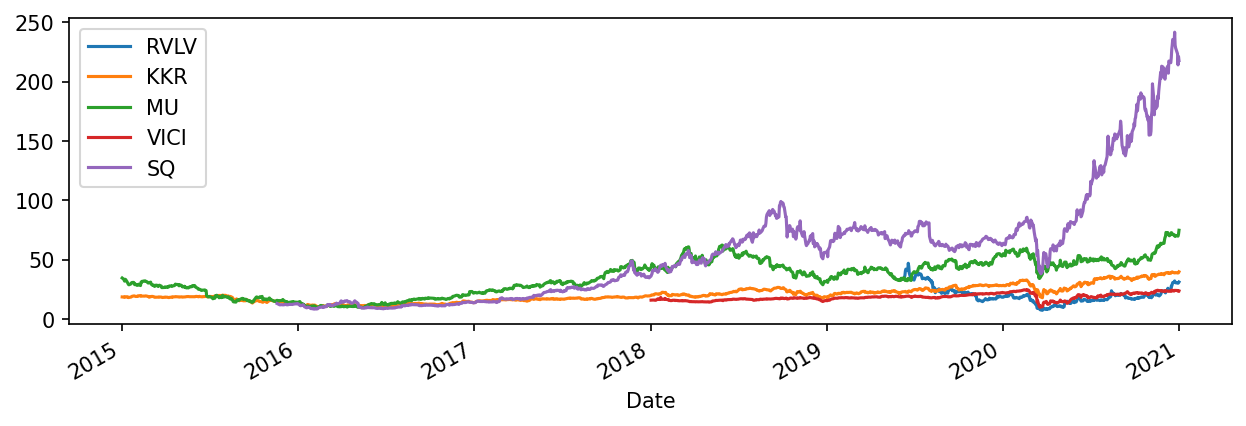

In [6]:
fig,ax = plt.subplots(dpi=150,figsize=(10,3))
RVLV['Adj Close'].plot(ax=ax,label='RVLV')
KKR['Adj Close'].plot(ax=ax,label='KKR')
MU['Adj Close'].plot(ax=ax,label='MU')
VICI['Adj Close'].plot(ax=ax,label='VICI')
SQ['Adj Close'].plot(ax=ax,label='SQ')
plt.legend()

In [7]:
def percent_calculate(ticker,start_date,end_date):
    if start_date not in ticker['Adj Close'].index:
        return f"Start Data is not located in index"
    if end_date not in ticker['Adj Close'].index:
        return f"end date is not located in index"
    adj_c_start = ticker['Adj Close'][start_date]
    adj_c_end = ticker['Adj Close'][end_date]
    change = 100*(adj_c_end-adj_c_start)/adj_c_start
    
    return f"the percent change is {np.round(change,2)}"

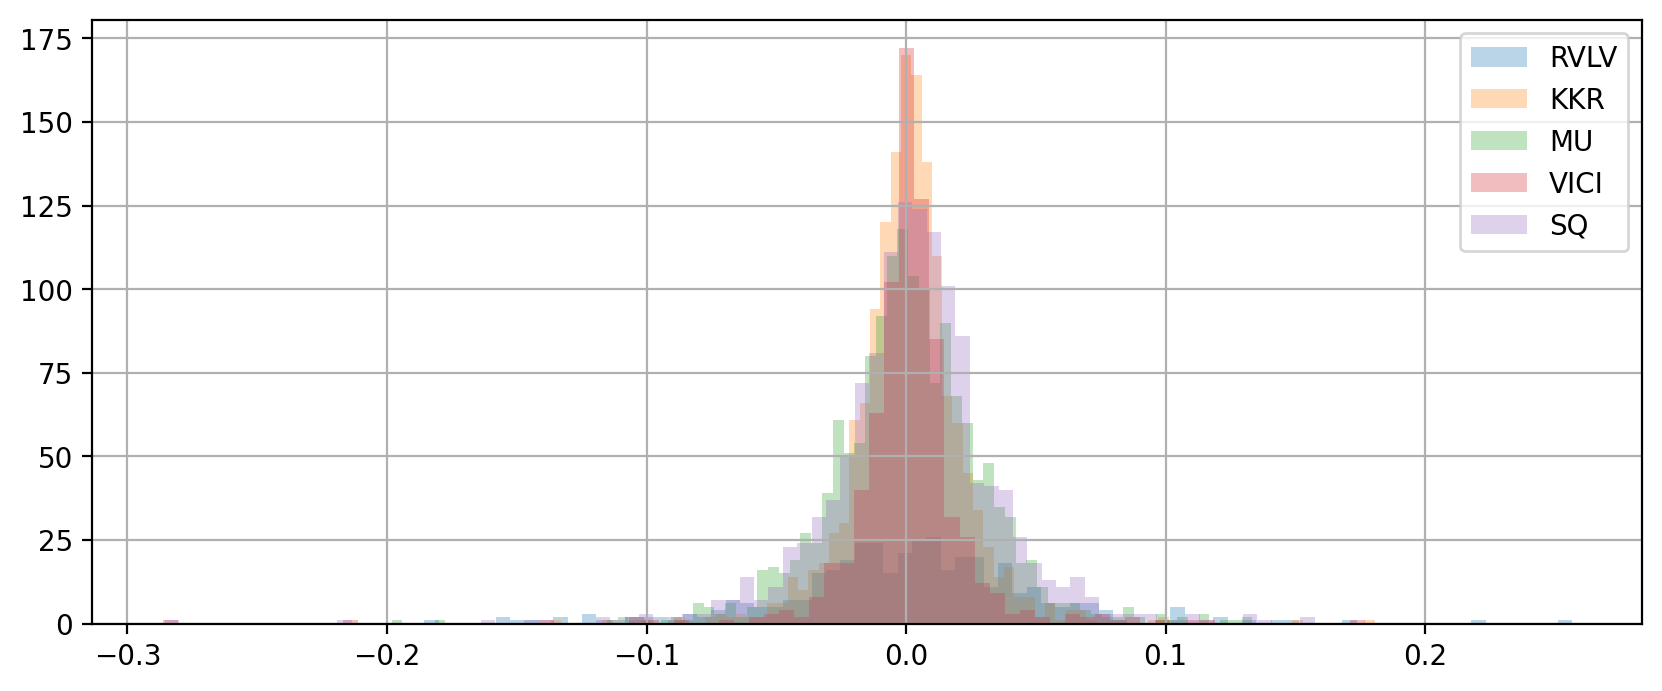

In [8]:
plt.figure(dpi=200,figsize=(10,4))

for stock_name,stock_df in portfolio_dict.items():
           stock_df['Adj Close'].pct_change(1).hist(label=stock_name,alpha=.3,bins=80)
        
plt.legend()

In [9]:
RVLV_returns = RVLV['Adj Close'].pct_change(1)[1:]
KKR_returns = KKR['Adj Close'].pct_change(1)[1:]
MU_returns = MU['Adj Close'].pct_change(1)[1:]
VICI_returns = VICI['Adj Close'].pct_change(1)[1:]
SQ_returns = SQ['Adj Close'].pct_change(1)[1:]

In [10]:
# Here we determine the annualized Sharpe Ratio
def compute_sharpe_ratio(data,risk_free_Rate=0):
    mean_return=data['Adj Close'].pct_change(1).mean()
    std = data['Adj Close'].pct_change(1).std()
    sharpe_ratio = (mean_return-risk_free_Rate)/std
    
    return (252**0.5)*sharpe_ratio

In [11]:
# here we will calculate the annualized return of each portfolio 

for ticker, df in portfolio_dict.items():
    print(f"{ticker} Annualized Sharpe Ratio is:{compute_sharpe_ratio(df)}")
    
    # this shows that MET had the worst Sharpe ratio and CVX had the best ratio

RVLV Annualized Sharpe Ratio is:0.3365519569688713
KKR Annualized Sharpe Ratio is:0.5419737423868248
MU Annualized Sharpe Ratio is:0.5090636906427416
VICI Annualized Sharpe Ratio is:0.544419156647826
SQ Annualized Sharpe Ratio is:1.2991642704171293


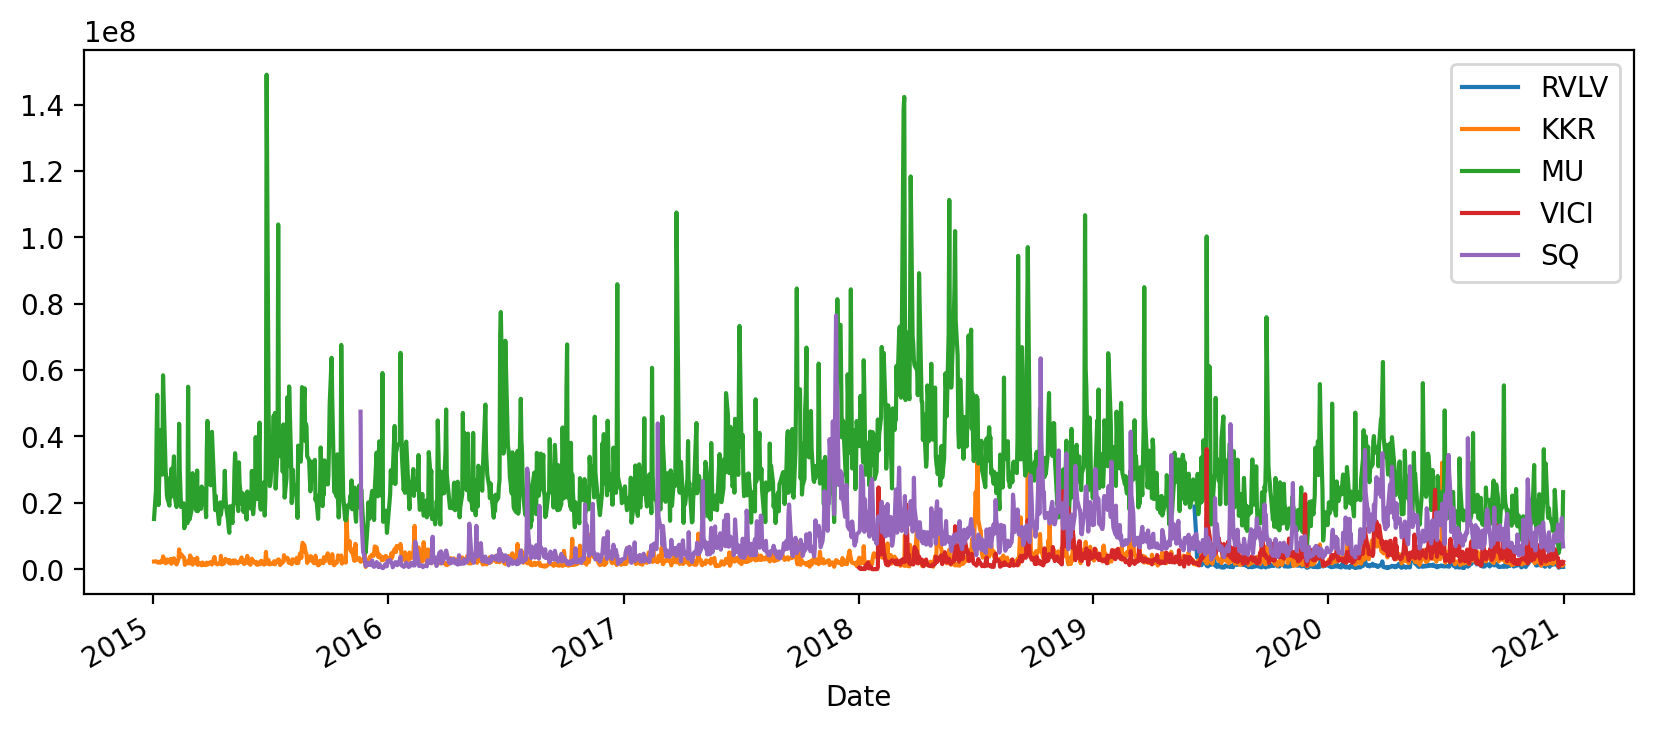

In [12]:
plt.figure(dpi=200,figsize=(10,4))

for stock_name,stock_df in portfolio_dict.items():
           stock_df['Volume'].plot(label=stock_name)
        
plt.legend()


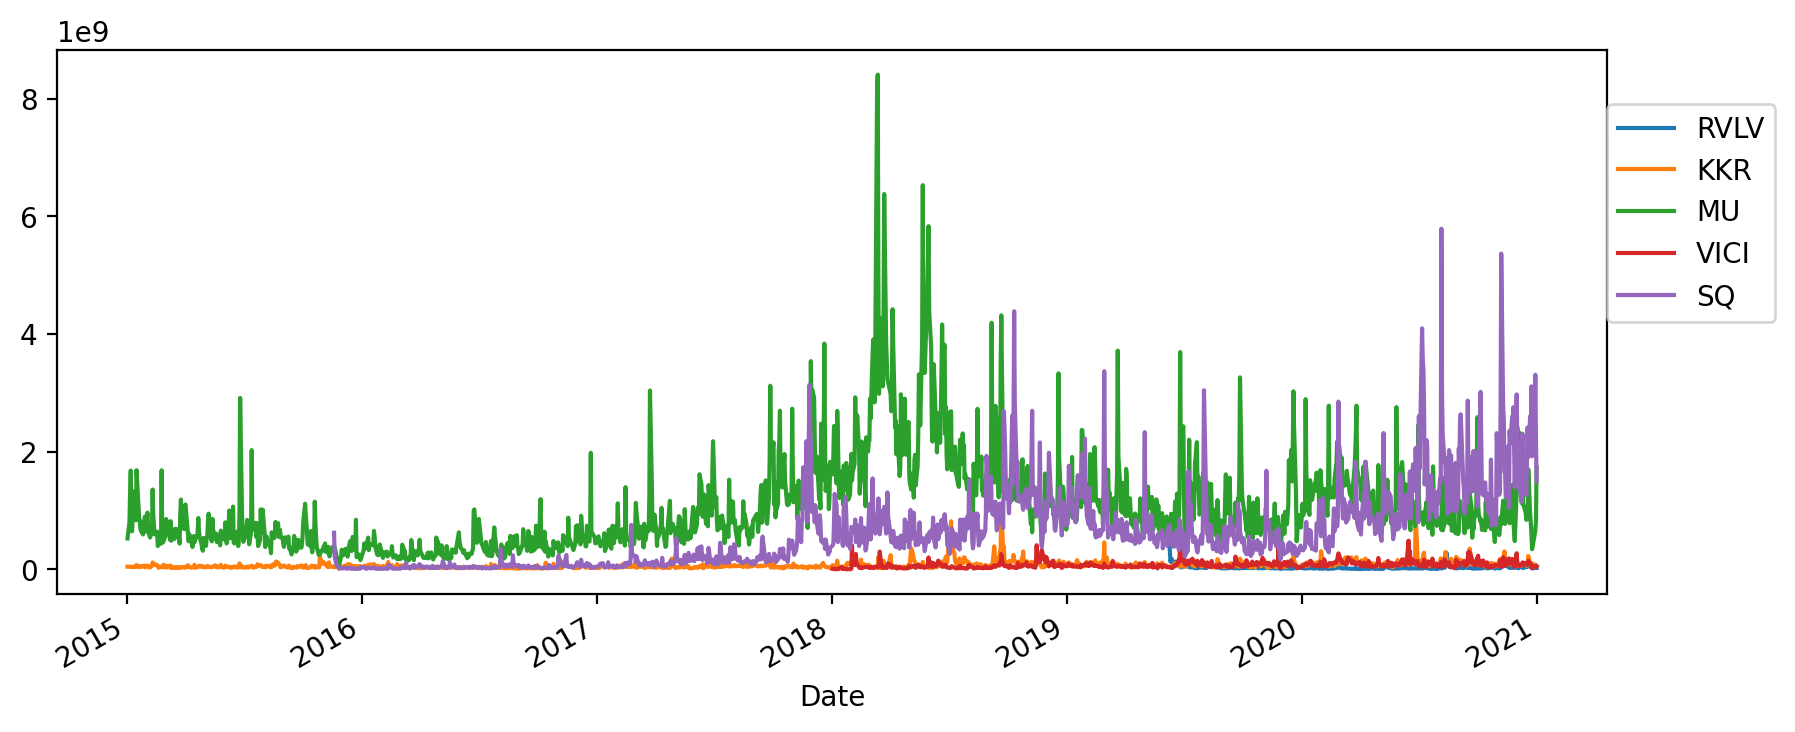

In [13]:
plt.figure(dpi=200,figsize=(10,4))

for stock_name,stock_df in portfolio_dict.items():
    
           (stock_df['Volume']*stock_df['Adj Close']).plot(label=stock_name)
        
plt.legend(loc=(1,0.5))

In [14]:
# Sortino Ratio
def compute_sortino_ratio(data,threshold=0,risk_free_Rate=0):
    mean_return=data['Adj Close'].pct_change(1).mean()
    downside = data[data['Adj Close'].pct_change(1)<threshold]['Adj Close'].pct_change(1)
    std = downside.std()
                    
    sortino_ratio= (mean_return-risk_free_Rate)/std
    
    return (252**0.5)*sortino_ratio

In [15]:
# PSR - Probablistic sharpe ratio 
# this will show the possibility of the sharp ratio results
import scipy.stats

In [16]:
def compute_psr(df, benchmark=0):
    
    sr = compute_sharpe_ratio(df)
    skew = scipy.stats.skew(df['Adj Close'])
    kurtosis = scipy.stats.kurtosis(df['Adj Close'], fisher=True)
    n = len(df)
                            
    sigma_sr = (( (1/n-1)) * (1+.5*sr**2 + skew*sr+(kurtosis/4)*sr**2)**.5)
    
    ratio = (sr-benchmark)/sigma_sr
                            
    psr = scipy.stats.norm.cdf(ratio)
    return psr 

In [17]:
RVLV_df = pd.DataFrame(RVLV['Adj Close'])

In [18]:
KKR_df = pd.DataFrame(KKR ['Adj Close'])

In [19]:
MU_df = pd.DataFrame(MU['Adj Close'])

In [20]:
VICI_df = pd.DataFrame(VICI  ['Adj Close'])

In [21]:
SQ_df = pd.DataFrame(SQ['Adj Close'])

In [22]:
portfolio1 = pd.concat([RVLV_df,KKR_df,MU_df,VICI_df,SQ_df] ,axis=1)

In [23]:
portfolio1.columns = ['RVLV','KKR','MU','VICI','SQ']

In [24]:
portfolio1.head()

,RVLV,KKR,MU,VICI,SQ
Date,,,,,
2015-01-02,NaN,18.586710,34.549583,NaN,NaN
2015-01-05,NaN,18.468021,33.585178,NaN,NaN
2015-01-06,NaN,18.286032,32.680424,NaN,NaN
2015-01-07,NaN,18.626270,31.914865,NaN,NaN
2015-01-08,NaN,18.515503,33.475807,NaN,NaN


In [25]:
portfolio1_returns = portfolio1.pct_change(1).dropna()

<AxesSubplot:xlabel='Date'>

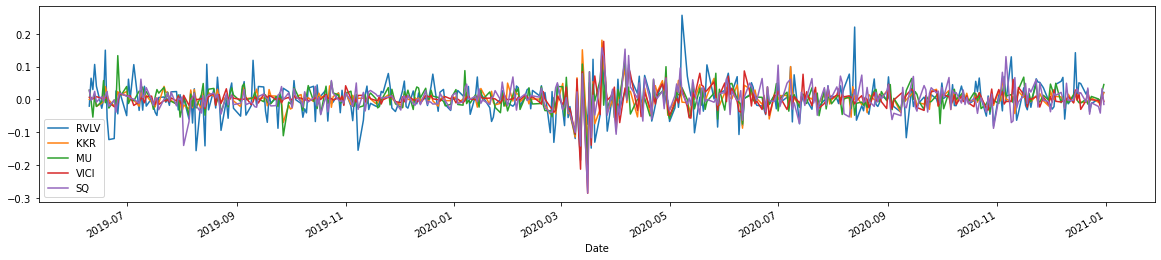

In [26]:
portfolio1_returns.plot(figsize=(20,4))

In [27]:
np.dot([1,0,0,0,0],portfolio1_returns.transpose())

array([-0.02058826,  0.06456461,  0.0299012 ,  0.10654624,  0.0398514 ,
       -0.02713638, -0.00097864,  0.15013463, -0.05685686, -0.12260104,
       -0.11940297,  0.02571587, -0.04415952,  0.02235469,  0.00583093,
       -0.04956519,  0.06160416,  0.00258547,  0.1060171 , -0.03367874,
        0.02707781, -0.03288964,  0.03994601, -0.02050343,  0.00291459,
       -0.01849398, -0.03930021, -0.04903334,  0.00589277,  0.00732279,
       -0.00872344,  0.00146668, -0.01816048,  0.02297137,  0.02391367,
       -0.03218459,  0.0144203 , -0.03104148,  0.00508977, -0.0598749 ,
        0.02408112, -0.07209158,  0.03234409, -0.1563307 ,  0.01186828,
       -0.02572835, -0.14174756,  0.10723977, -0.03187572,  0.03039254,
       -0.02621874,  0.06773238,  0.00118206, -0.09445099, -0.00347675,
       -0.05756649,  0.02683942,  0.05002247, -0.02703859, -0.05116894,
        0.02975357,  0.05417611, -0.04796577, -0.01889339,  0.11921139,
        0.02662842, -0.01795686,  0.03941484,  0.03792022, -0.03

In [28]:
N = len(portfolio1_returns.columns)

In [29]:
equal_dis = N * [1/N]

In [30]:
equal_returns = np.dot(equal_dis,portfolio1_returns.transpose())

In [31]:
equal_returns

array([ 8.31627350e-03,  1.33655552e-02, -3.15758883e-03,  3.14636356e-02,
       -5.70771793e-04, -6.75754094e-03,  8.56595625e-03,  3.92519157e-02,
       -1.27115104e-03, -3.62747369e-02, -3.32229042e-02, -1.11300079e-02,
        2.08196197e-02,  2.07783168e-02,  1.34172629e-02,  6.90862826e-03,
        1.34443000e-02,  4.55708087e-03,  1.64005744e-02, -9.76812144e-03,
        2.86518612e-02,  3.52030245e-03,  1.32696373e-02,  1.20024329e-02,
       -6.92565676e-05, -1.95852098e-02, -1.33907971e-02, -2.50679530e-03,
       -6.84911428e-03,  1.62633771e-02,  1.34308695e-03,  1.29303344e-02,
       -6.42068099e-03,  8.08448827e-03, -5.76780297e-03, -1.68007463e-04,
       -1.14661613e-02, -2.19307895e-02, -2.58093117e-02, -4.48031920e-02,
        1.31238943e-02, -2.11339052e-02,  2.25629305e-02, -4.06239225e-02,
       -8.20950502e-03,  1.18343604e-02, -5.39947052e-02,  2.02754656e-02,
        8.27630792e-03,  2.22604509e-02, -9.62405956e-03,  2.49027917e-02,
        3.49097763e-03, -

In [32]:
log_rets = np.log(portfolio1_returns/portfolio1_returns.shift(1))

In [33]:
log_rets

,RVLV,KKR,MU,VICI,SQ
Date,,,,,
2019-06-10,NaN,NaN,NaN,NaN,NaN
2019-06-11,NaN,inf,NaN,-0.342815,NaN
2019-06-12,-0.769768,-0.291049,2.936732,-0.920846,NaN
2019-06-13,1.270681,1.250280,NaN,1.009965,1.811313
2019-06-14,-0.983421,NaN,NaN,0.541565,NaN
...,...,...,...,...,...
2020-12-24,-1.119741,0.167762,NaN,0.406134,-1.467128
2020-12-28,-inf,NaN,-2.072602,1.099748,0.732358
2020-12-29,NaN,-1.965025,NaN,1.776547,0.658818


In [34]:
weights = np.random.random(N)

In [35]:
weights / np.sum(weights)

array([0.18362939, 0.41525234, 0.20593735, 0.10232086, 0.09286006])

In [36]:
# this is will create a random generated weight amount to go off of

def gen_weights(N):
    weights = np.random.random(N)
    return weights / np.sum(weights)

In [37]:
gen_weights(5)

array([0.03065973, 0.29987291, 0.27317405, 0.33222006, 0.06407326])

In [38]:
def calculate_returns(Weights,log_rets):
    return np.sum(log_rets.mean()*weights)*252

In [39]:
log_rets.cov()

,RVLV,KKR,MU,VICI,SQ
RVLV,2.460721,-0.300440,0.627637,-0.016065,0.516884
KKR,-0.300440,2.834316,0.084682,0.232066,0.188474
MU,0.627637,0.084682,2.697979,-0.041604,0.046916
VICI,-0.016065,0.232066,-0.041604,1.738136,0.194825
SQ,0.516884,0.188474,0.046916,0.194825,2.041561


In [40]:
def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [41]:
log_rets_cov = log_rets.cov()

In [42]:
Monte_portfolio_retrns = []
Mont_Port_Vol = []
Mont_weights = []

for sim in range(4000):
    weights = gen_weights(N=5)
    Mont_weights.append(weights)
    sim_rt = calculate_returns(weights,log_rets)
    Monte_portfolio_retrns.append(sim_rt)
    sim_vol = calculate_volatility(weights,log_rets_cov)
    Mont_Port_Vol.append(sim_vol)

In [43]:
mc_sharpe_ratios = np.array(Monte_portfolio_retrns)/np.array(Mont_Port_Vol)

Text(0, 0.5, 'Returns')

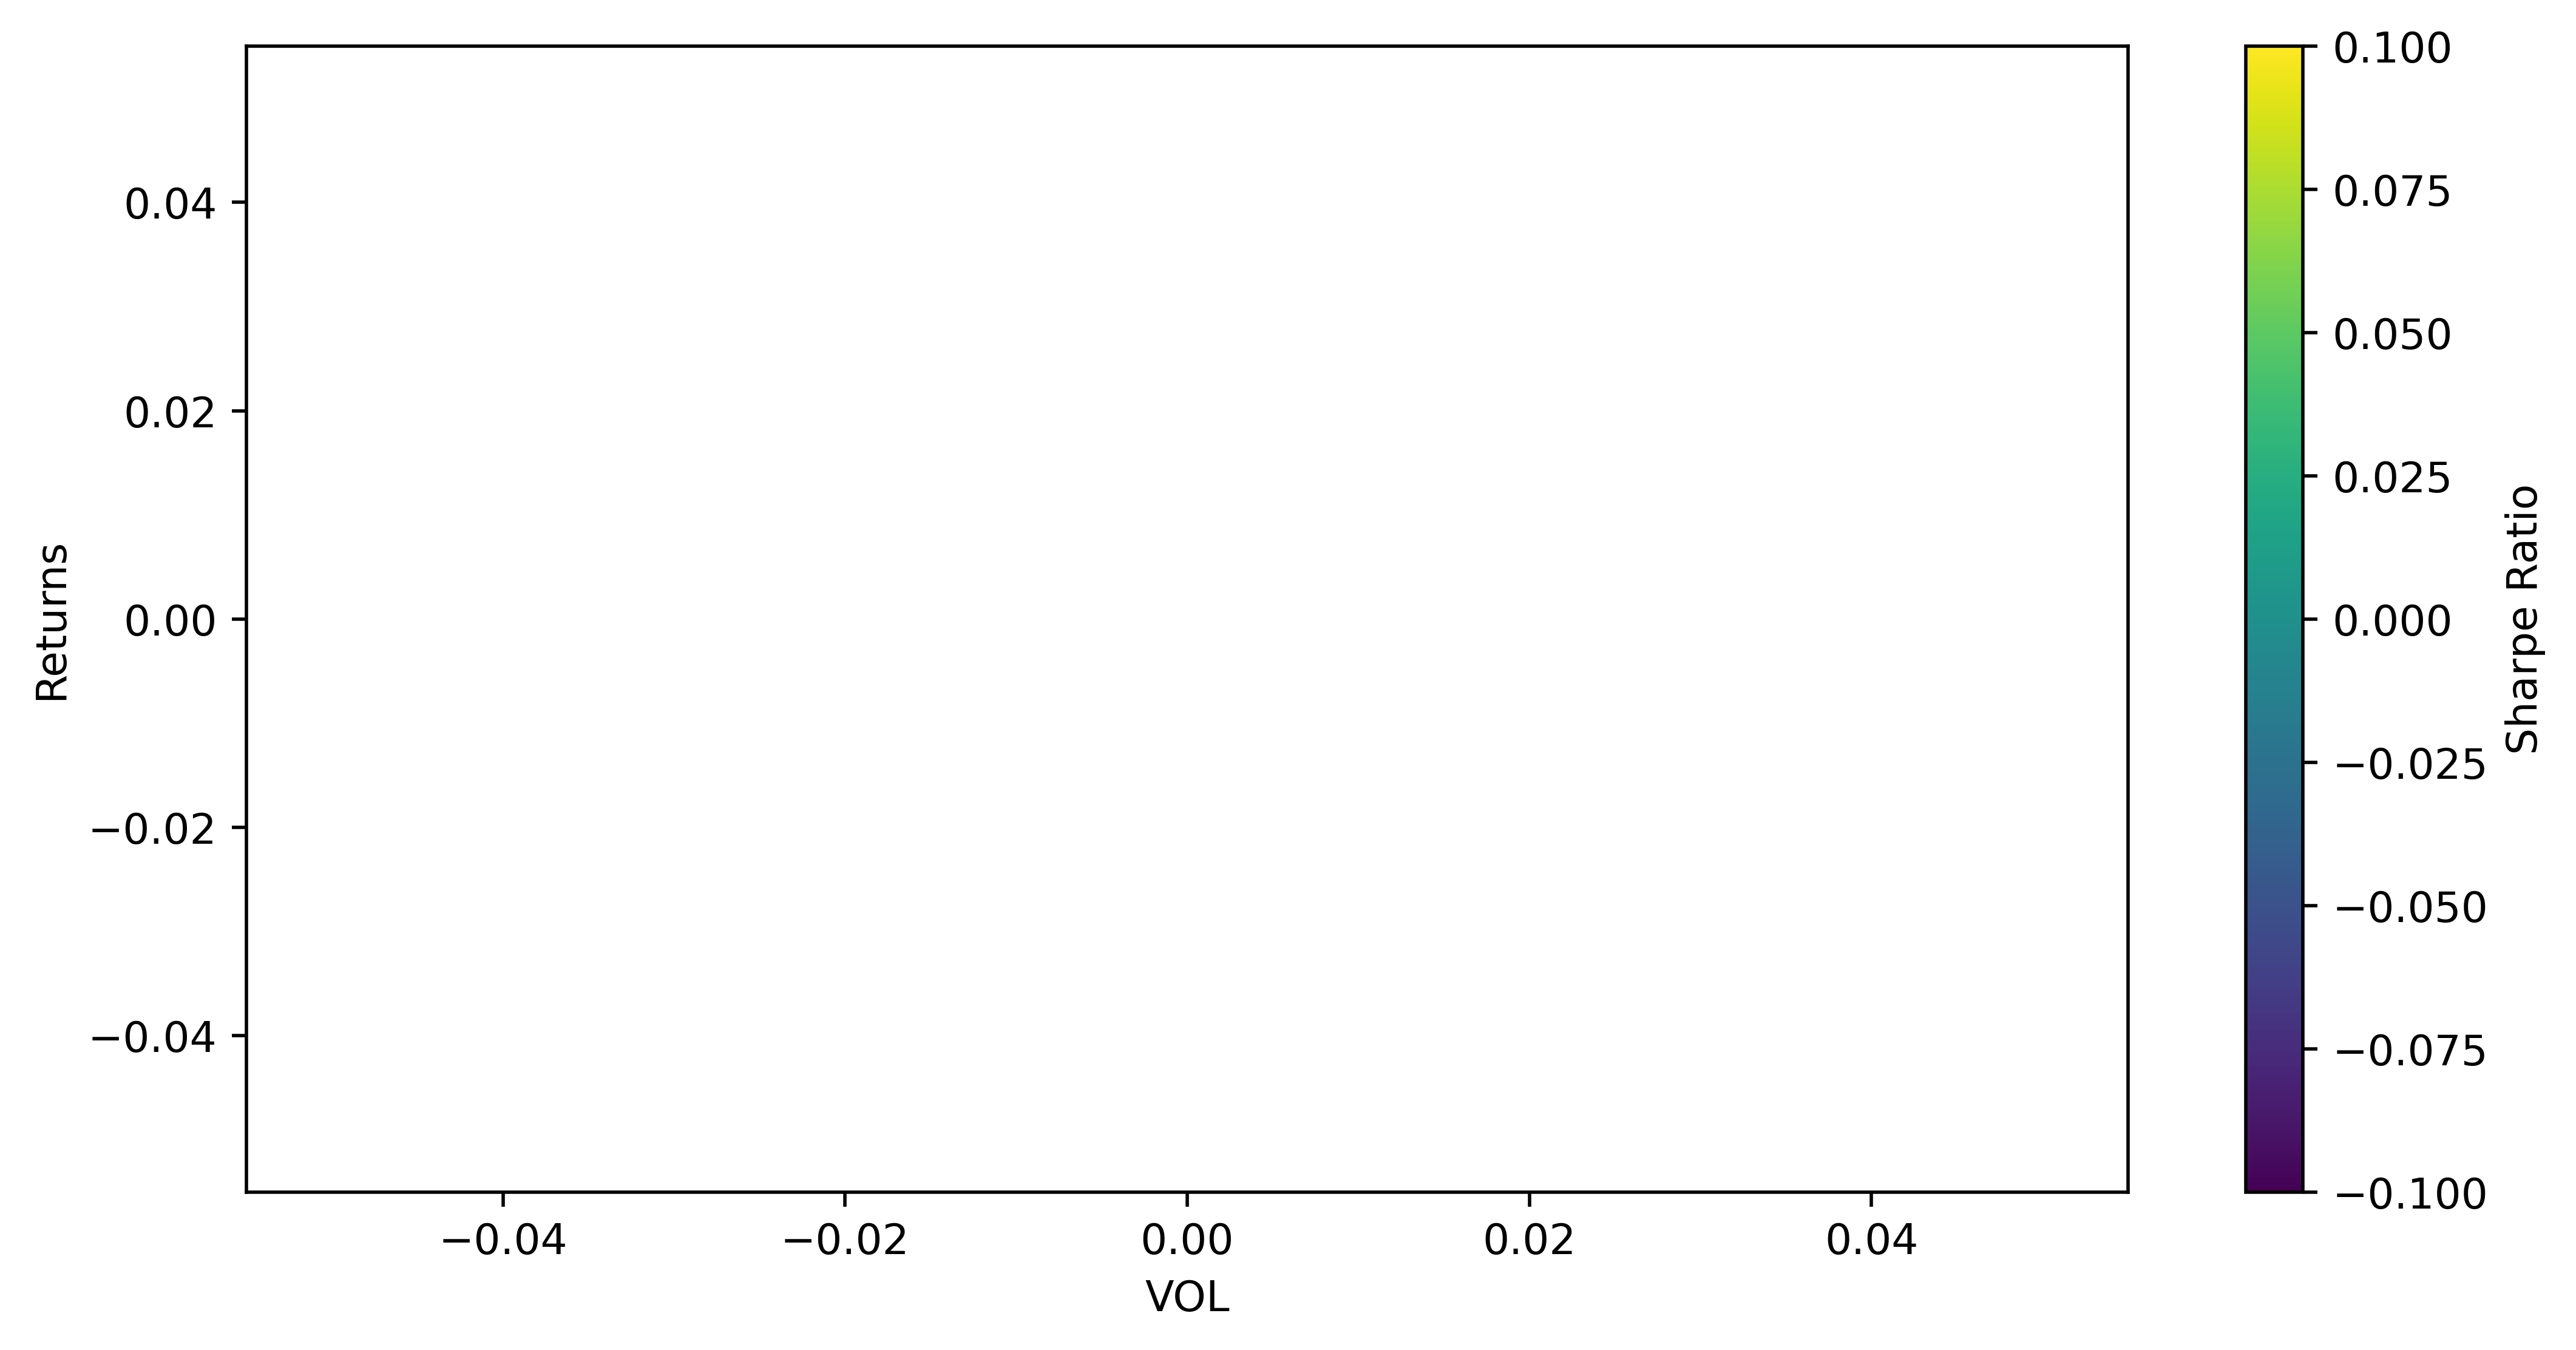

In [53]:
plt.figure(dpi=500, figsize=(10,5))
plt.scatter(Mont_Port_Vol,Monte_portfolio_retrns, c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('VOL')
plt.ylabel('Returns') 

In [54]:
np.argmax(mc_sharpe_ratios)

0

In [55]:
portfolio1

,RVLV,KKR,MU,VICI,SQ
Date,,,,,
2015-01-02,NaN,18.586710,34.549583,NaN,NaN
2015-01-05,NaN,18.468021,33.585178,NaN,NaN
2015-01-06,NaN,18.286032,32.680424,NaN,NaN
2015-01-07,NaN,18.626270,31.914865,NaN,NaN
2015-01-08,NaN,18.515503,33.475807,NaN,NaN
...,...,...,...,...,...
2020-12-24,30.48,39.135281,70.172935,24.073332,228.279999
2020-12-28,30.48,38.781651,70.252480,23.989614,223.339996
2020-12-29,30.10,38.732536,69.805077,23.496614,214.000000


In [56]:
from scipy.optimize import minimize

In [57]:
def function_to_minimize(weights):
    
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [58]:
bounds = tuple((0,1) for n in range (N))

In [59]:
sum_constraint =({'type':'eq','fun': lambda weights: np.sum(weights)-1})

In [60]:
equal_weights = [.20,.20,.20,.20,.20]

In [61]:
minimize(fun=function_to_minimize,
         x0=equal_weights,
         bounds=bounds,
         constraints=sum_constraint)

C:\Users\halos\anaconda3\envs\mlenv\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


     fun: inf
     jac: array([nan, nan, nan, nan, nan])
 message: 'Inequality constraints incompatible'
    nfev: 6
     nit: 1
    njev: 1
  status: 4
 success: False
       x: array([0.2, 0.2, 0.2, 0.2, 0.2])

<AxesSubplot:xlabel='Date'>

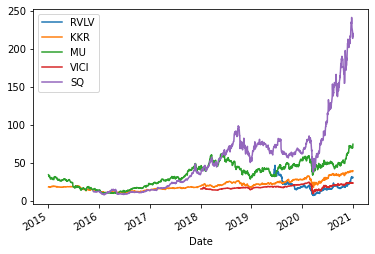

In [122]:
portfolio1.plot()